In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import dynadojo as dd
import numpy as np

(<Figure size 640x480 with 1 Axes>, <Axes: >)

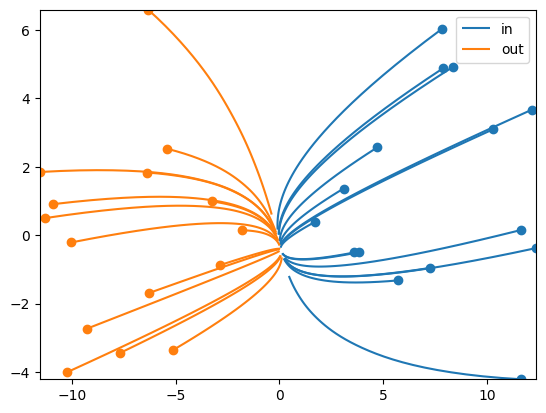

In [16]:
latent_dim = 2
embed_dim = 3
n = 5000
timesteps = 50
system = dd.systems.LDSSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

Epoch 1/20
157/157 [==============================] - 4s 7ms/step - loss: 1.3360
Epoch 2/20
157/157 [==============================] - 1s 8ms/step - loss: 0.9200
Epoch 3/20
157/157 [==============================] - 1s 8ms/step - loss: 0.6259
Epoch 4/20
157/157 [==============================] - 1s 9ms/step - loss: 0.4280
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3018
Epoch 6/20
157/157 [==============================] - 1s 9ms/step - loss: 0.2230
Epoch 7/20
157/157 [==============================] - 2s 10ms/step - loss: 0.1740
Epoch 8/20
157/157 [==============================] - 1s 8ms/step - loss: 0.1435
Epoch 9/20
157/157 [==============================] - 1s 9ms/step - loss: 0.1244
Epoch 10/20
157/157 [==============================] - 1s 9ms/step - loss: 0.1121
Epoch 11/20
157/157 [==============================] - 1s 9ms/step - loss: 0.1040
Epoch 12/20
157/157 [==============================] - 1s 9ms/step - loss: 0.0985
Epoch 13/20
157/157 [===

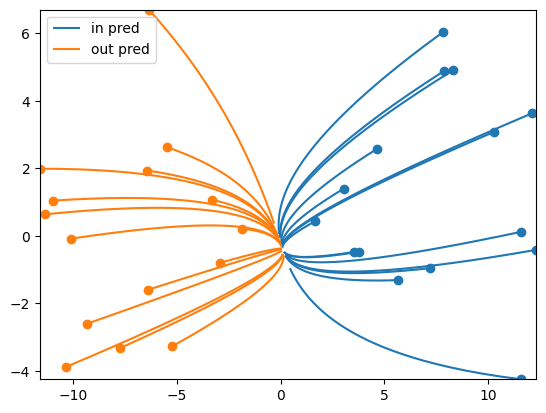

In [18]:
linear_model = dd.baselines.DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=20, verbose='auto')
x_pred = linear_model.predict(x[:, 0], timesteps)
y_pred = linear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

Epoch 1/20
157/157 [==============================] - 3s 6ms/step - loss: 1.7219
Epoch 2/20
157/157 [==============================] - 1s 6ms/step - loss: 0.8594
Epoch 3/20
157/157 [==============================] - 1s 6ms/step - loss: 0.5438
Epoch 4/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3859
Epoch 5/20
157/157 [==============================] - 1s 7ms/step - loss: 0.3056
Epoch 6/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2633
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2403
Epoch 8/20
157/157 [==============================] - 1s 6ms/step - loss: 0.2262
Epoch 9/20
157/157 [==============================] - 1s 6ms/step - loss: 0.2164
Epoch 10/20
157/157 [==============================] - 1s 7ms/step - loss: 0.2095
Epoch 11/20
157/157 [==============================] - 1s 6ms/step - loss: 0.2038
Epoch 12/20
157/157 [==============================] - 1s 6ms/step - loss: 0.1989
Epoch 13/20
157/157 [====

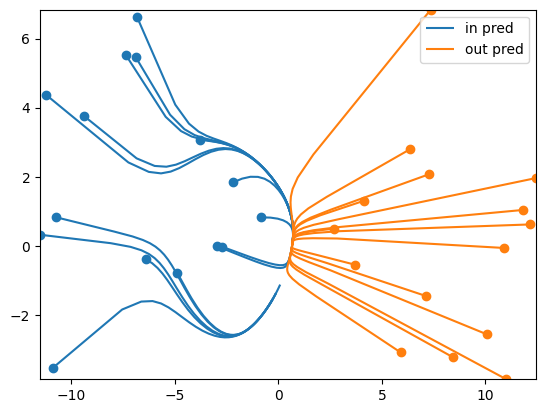

In [19]:
nonlinear_model = dd.baselines.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=20, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], timesteps)
y_pred = nonlinear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")